In [20]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from feature_engine.selection import DropCorrelatedFeatures

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


In [21]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - {}'.format(model_name))
    plt.savefig("images/{}_confusion_matrix.png".format(model_name))
    plt.show()

In [22]:
songs = pd.read_csv("Data/songs_w_features_year.csv")
songs.drop(columns=['X', 'Artist', 'Title', 'URI', 'Release_Year'], inplace=True)

In [23]:
# Train-Test Split
X = songs.drop(columns=['Top100'])
y = songs['Top100']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [24]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### NOT USING PCA AS IT IS NOT HELPFUL

In [25]:
# pca = PCA(n_components = 10)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
print(X_train.shape)

(12795, 13)


Model 0 (Baseline) Accuracy: 0.662681669010783
Model 0 (Baseline) AUC: 0.5


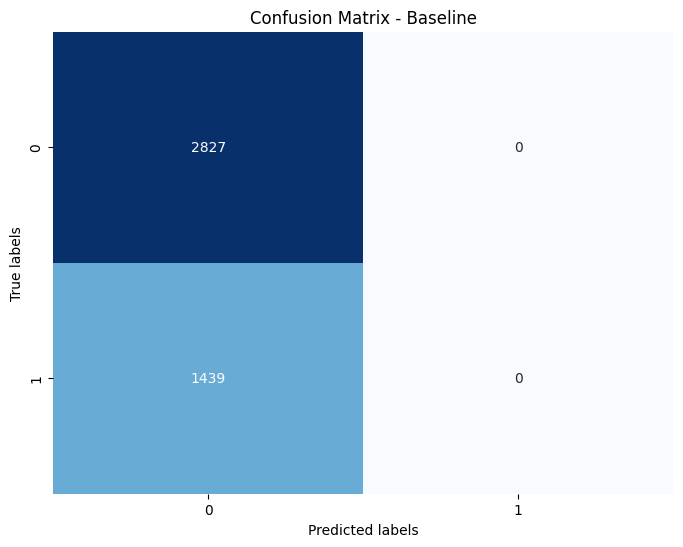

In [26]:

# Model 0: Baseline
baseline_model = DummyClassifier(random_state=123)
baseline_model.fit(X_train_scaled, y_train)
baseline_pred = baseline_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline_model.predict_proba(X_test_scaled)[:,1])
baseline_auc = auc(baseline_fpr, baseline_tpr)
conf_matrix_log = confusion_matrix(y_test, baseline_pred)

print("Model 0 (Baseline) Accuracy:", baseline_accuracy)
print("Model 0 (Baseline) AUC:", baseline_auc)
plot_confusion_matrix(conf_matrix_log, "Baseline")



Model 1 (Logistic Regression) Accuracy: 0.7044069385841538
Model 1 (Logistic Regression) AUC: 0.7240928276991474


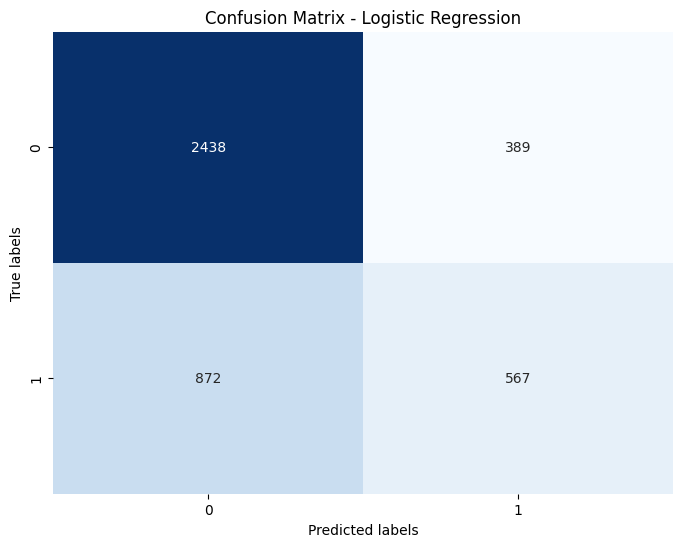

In [27]:
# Model 1: Logistic Regression
log_model = LogisticRegression(random_state=123)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test, log_pred)
log_fpr, log_tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:,1])
log_auc = auc(log_fpr, log_tpr)
conf_matrix_log = confusion_matrix(y_test, log_pred)
print("Model 1 (Logistic Regression) Accuracy:", log_accuracy)
print("Model 1 (Logistic Regression) AUC:", log_auc)
plot_confusion_matrix(conf_matrix_log, "Logistic Regression")



Model 2 (LDA) Accuracy: 0.7025316455696202
Model 2 (LDA) AUC: 0.7199107287933564


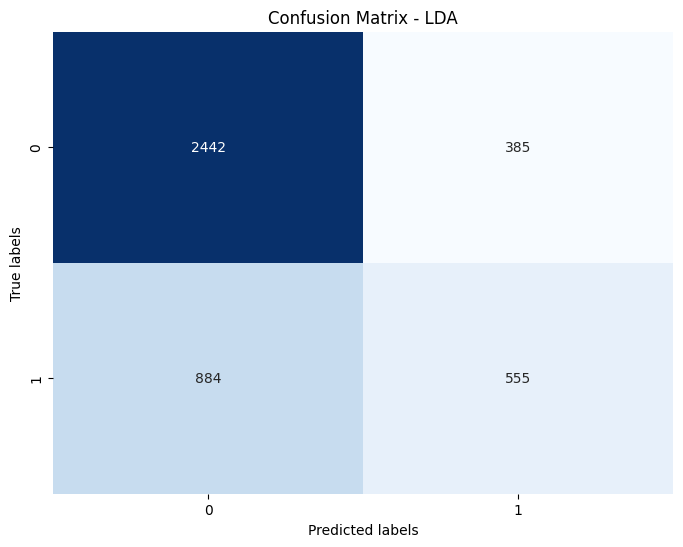

In [28]:

# Model 2: Linear Discriminant Analysis
lda_model = LDA()
lda_model.fit(X_train_scaled, y_train)
lda_pred = lda_model.predict(X_test_scaled)
lda_accuracy = accuracy_score(y_test, lda_pred)
lda_fpr, lda_tpr, _ = roc_curve(y_test, lda_model.predict_proba(X_test_scaled)[:,1])
lda_auc = auc(lda_fpr, lda_tpr)
conf_matrix_lda = confusion_matrix(y_test, lda_pred)

print("Model 2 (LDA) Accuracy:", lda_accuracy)
print("Model 2 (LDA) AUC:", lda_auc)
plot_confusion_matrix(conf_matrix_lda, "LDA")


Model 3 (Random Forest) Accuracy: 0.8511486169714018
Model 3 (Random Forest) AUC: 0.9335220067191847


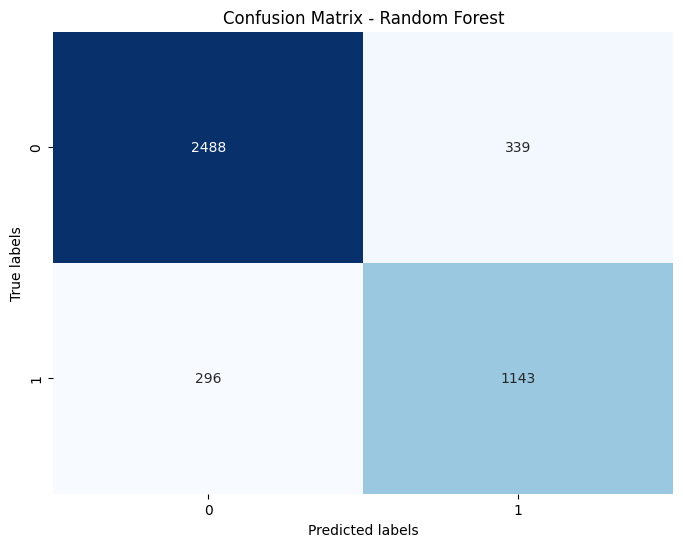

In [29]:
# Model 3: Random Forest
rf_model = RandomForestClassifier(random_state=123,max_depth=10,n_estimators=1000)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

print("Model 3 (Random Forest) Accuracy:", rf_accuracy)
print("Model 3 (Random Forest) AUC:", rf_auc)
plot_confusion_matrix(conf_matrix_rf, "Random Forest")


Model 4 (Bagging) Accuracy: 0.8511486169714018
Model 4 (Bagging) AUC: 0.9345138817021311


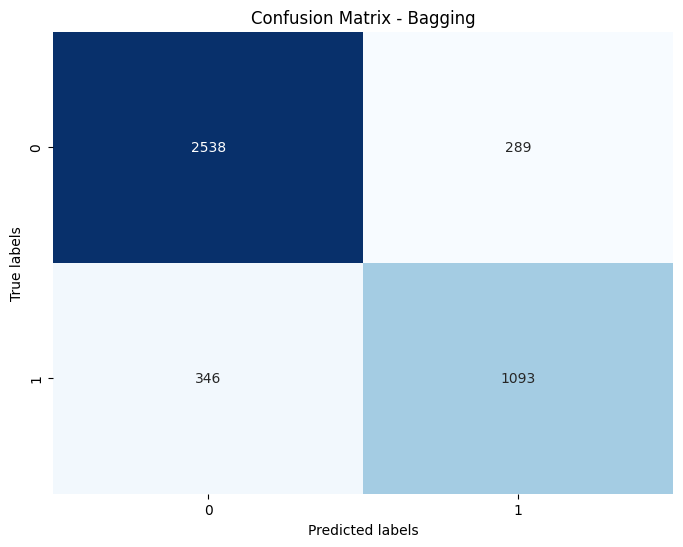

In [30]:
# Model 4: Bagging
bag_model = BaggingClassifier(random_state=123,n_estimators=1000)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)
bag_accuracy = accuracy_score(y_test, bag_pred)
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_model.predict_proba(X_test)[:,1])
bag_auc = auc(bag_fpr, bag_tpr)
conf_matrix_bag = confusion_matrix(y_test, bag_pred)

print("Model 4 (Bagging) Accuracy:", bag_accuracy)
print("Model 4 (Bagging) AUC:", bag_auc)
plot_confusion_matrix(conf_matrix_bag, "Bagging")



Model 5 (AdaBoost) Accuracy: 0.823722456633849
Model 5 (AdaBoost) AUC: 0.914884835571218


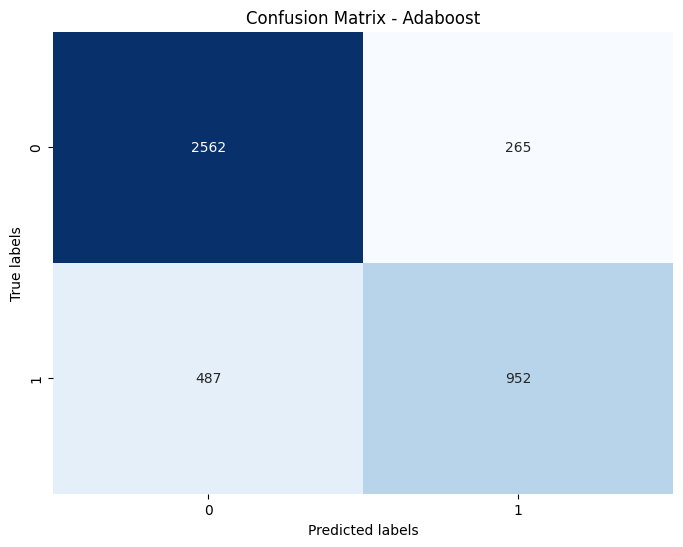

In [31]:

#Model 5: AdaBoost
adaboost_model=AdaBoostClassifier(algorithm="SAMME",n_estimators=10000)
adaboost_model.fit(X_train_scaled, y_train)
adaboost_pred=adaboost_model.predict(X_test_scaled)
adaboost_accuracy=accuracy_score(y_test,adaboost_pred)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_model.predict_proba(X_test_scaled)[:,1])
adaboost_auc = auc(adaboost_fpr, adaboost_tpr)
conf_matrix_adaboost = confusion_matrix(y_test, adaboost_pred)

print("Model 5 (AdaBoost) Accuracy:", adaboost_accuracy)
print("Model 5 (AdaBoost) AUC:", adaboost_auc)
plot_confusion_matrix(conf_matrix_adaboost, "Adaboost")


Model 6 (QDA) Accuracy: 0.6315049226441631
Model 6 (QDA) AUC: 0.7488374659818838


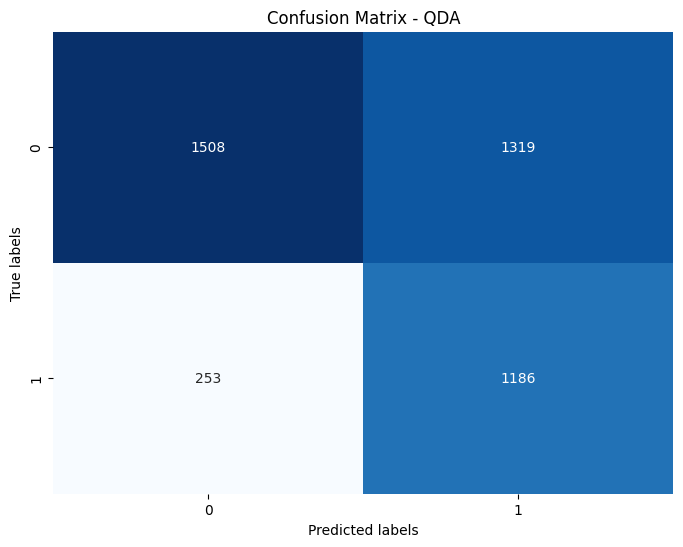

In [32]:

#Model 6: Quadratic Discriminant Analysis
QDA_model=QDA()
QDA_model.fit(X_train_scaled, y_train)
QDA_pred=QDA_model.predict(X_test_scaled)
QDA_accuracy=accuracy_score(y_test,QDA_pred)
QDA_fpr, QDA_tpr, _ = roc_curve(y_test, QDA_model.predict_proba(X_test_scaled)[:,1])
QDA_auc = auc(QDA_fpr, QDA_tpr)
conf_matrix_qda = confusion_matrix(y_test, QDA_pred)

print("Model 6 (QDA) Accuracy:", QDA_accuracy)
print("Model 6 (QDA) AUC:", QDA_auc)
plot_confusion_matrix(conf_matrix_qda, "QDA")


Model 7 (Gradient Boosting) Accuracy: 0.8506797937177684
Model 7 (Gradient Boosting) AUC: 0.93378454017192


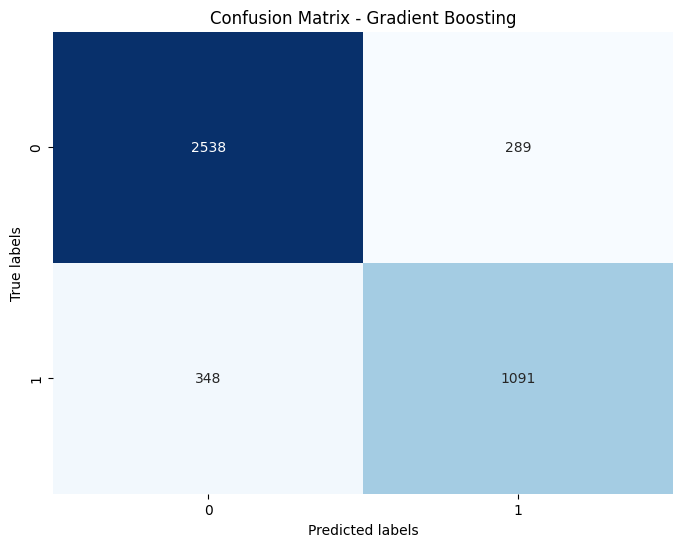

In [33]:

#Model 7: Gradient Boosting
GradientBoosting_model=GradientBoostingClassifier(criterion='squared_error',n_estimators=5000)
GradientBoosting_model.fit(X_train_scaled, y_train)
GradientBoosting_pred=GradientBoosting_model.predict(X_test_scaled)
GradientBoosting_accuracy=accuracy_score(y_test,GradientBoosting_pred)
GradientBoosting_fpr, GradientBoosting_tpr, _ = roc_curve(y_test, GradientBoosting_model.predict_proba(X_test_scaled)[:,1])
GradientBoosting_auc = auc(GradientBoosting_fpr, GradientBoosting_tpr)
conf_matrix_gb = confusion_matrix(y_test, GradientBoosting_pred)

print("Model 7 (Gradient Boosting) Accuracy:", GradientBoosting_accuracy)
print("Model 7 (Gradient Boosting) AUC:", GradientBoosting_auc)
plot_confusion_matrix(conf_matrix_gb, "Gradient Boosting")

[LightGBM] [Info] Number of positive: 4313, number of negative: 8482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2263
[LightGBM] [Info] Number of data points in the train set: 12795, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337085 -> initscore=-0.676313
[LightGBM] [Info] Start training from score -0.676313
Model 8 (lightgbm) Accuracy: 0.8511486169714018
Model 8 (lightgbm) AUC: 0.9344674221304393


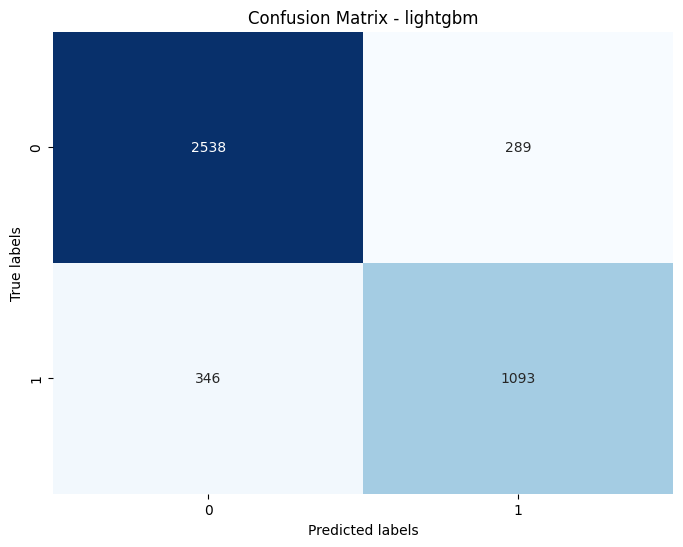

In [34]:

#Model 8: light gbm
lightgbm_model=lgb.LGBMClassifier(n_estimators=500,random_state=123)
lightgbm_model.fit(X_train_scaled, y_train)
lightgbm_pred=lightgbm_model.predict(X_test_scaled)
lightgbm_accuracy=accuracy_score(y_test,lightgbm_pred)
lightgbm_fpr, lightgbm_tpr, _ = roc_curve(y_test, lightgbm_model.predict_proba(X_test_scaled)[:,1])
lightgbm_auc = auc(lightgbm_fpr, lightgbm_tpr)
conf_matrix_lightgbm = confusion_matrix(y_test, lightgbm_pred)

print("Model 8 (lightgbm) Accuracy:", lightgbm_accuracy)
print("Model 8 (lightgbm) AUC:", lightgbm_auc)
plot_confusion_matrix(conf_matrix_lightgbm, "lightgbm")

Model 1 (Logistic Regression) Accuracy: 0.8335677449601501
Model 1 (Logistic Regression) AUC: 0.9173867695430714


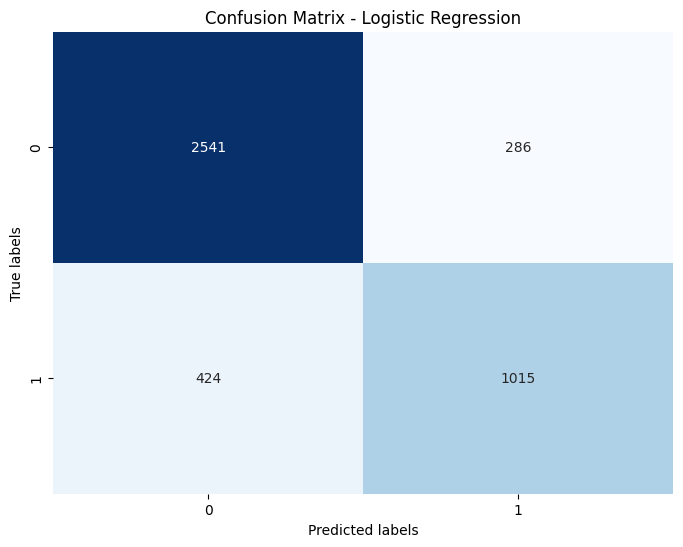

In [35]:
# Model 9: K-Nearest Neighbors 
KNN_model = KNeighborsClassifier(n_neighbors=10,algorithm='kd_tree',weights='distance')
KNN_model.fit(X_train_scaled, y_train)
KNN_pred = KNN_model.predict(X_test_scaled)
KNN_accuracy = accuracy_score(y_test, KNN_pred)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_model.predict_proba(X_test_scaled)[:,1])
KNN_auc = auc(KNN_fpr, KNN_tpr)
conf_matrix_KNN = confusion_matrix(y_test, KNN_pred)
print("Model 1 (Logistic Regression) Accuracy:", KNN_accuracy)
print("Model 1 (Logistic Regression) AUC:", KNN_auc)
plot_confusion_matrix(conf_matrix_KNN, "Logistic Regression")



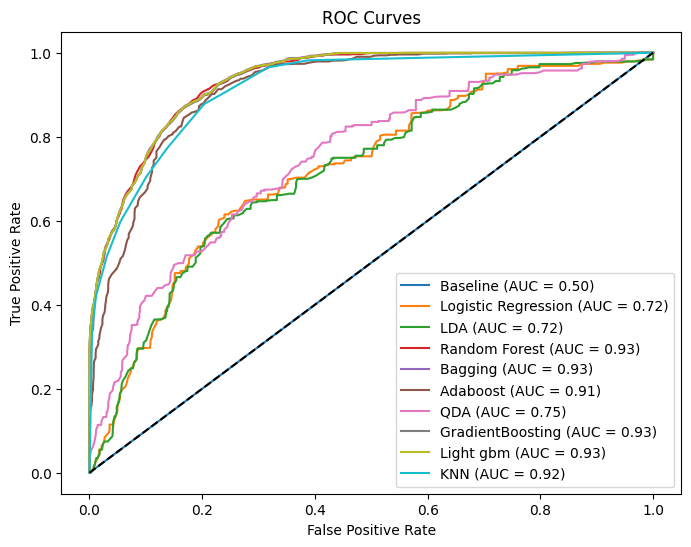

In [36]:

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(baseline_fpr, baseline_tpr, label="Baseline (AUC = {:.2f})".format(baseline_auc))
plt.plot(log_fpr, log_tpr, label="Logistic Regression (AUC = {:.2f})".format(log_auc))
plt.plot(lda_fpr, lda_tpr, label="LDA (AUC = {:.2f})".format(lda_auc))
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:.2f})".format(rf_auc))
plt.plot(bag_fpr, bag_tpr, label="Bagging (AUC = {:.2f})".format(bag_auc))
plt.plot(adaboost_fpr, adaboost_tpr, label="Adaboost (AUC = {:.2f})".format(adaboost_auc))
plt.plot(QDA_fpr, QDA_tpr, label="QDA (AUC = {:.2f})".format(QDA_auc))
plt.plot(GradientBoosting_fpr, GradientBoosting_tpr, label="GradientBoosting (AUC = {:.2f})".format(GradientBoosting_auc))
plt.plot(lightgbm_fpr, lightgbm_tpr, label="Light gbm (AUC = {:.2f})".format(lightgbm_auc))
plt.plot(KNN_fpr, KNN_tpr, label="KNN (AUC = {:.2f})".format(KNN_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.savefig("images/ROC.png")
plt.legend()
plt.show()